In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
up=files.upload()

Saving crime_data.csv to crime_data.csv
Saving ProblemSatement(crime_data).txt to ProblemSatement(crime_data).txt


In [ ]:
with open('ProblemSatement(crime_data).txt','r') as f:
    print(f.read())

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States



In [3]:
df=pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
df.rename(columns={df.columns[0]:'state'},inplace=1)

In [ ]:
df.isna().sum()

state       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

## **feature correlation**

<Axes: >

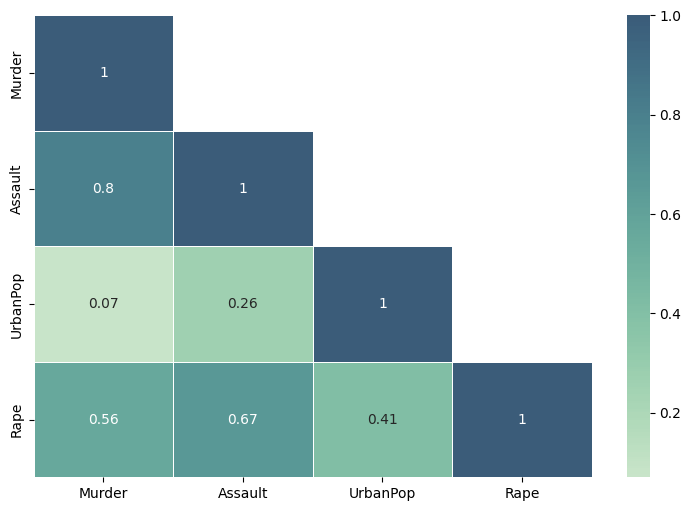

In [ ]:
a=np.zeros_like(df.corr(),dtype=bool)
a[np.triu_indices(4,1)]=True
plt.figure(figsize=(9,6))
c=sns.color_palette("ch:start=.2,rot=-.5", as_cmap=True)
sns.heatmap(df.corr(),annot=True,mask=a,cmap=c,center=0.7,linewidths=.5)

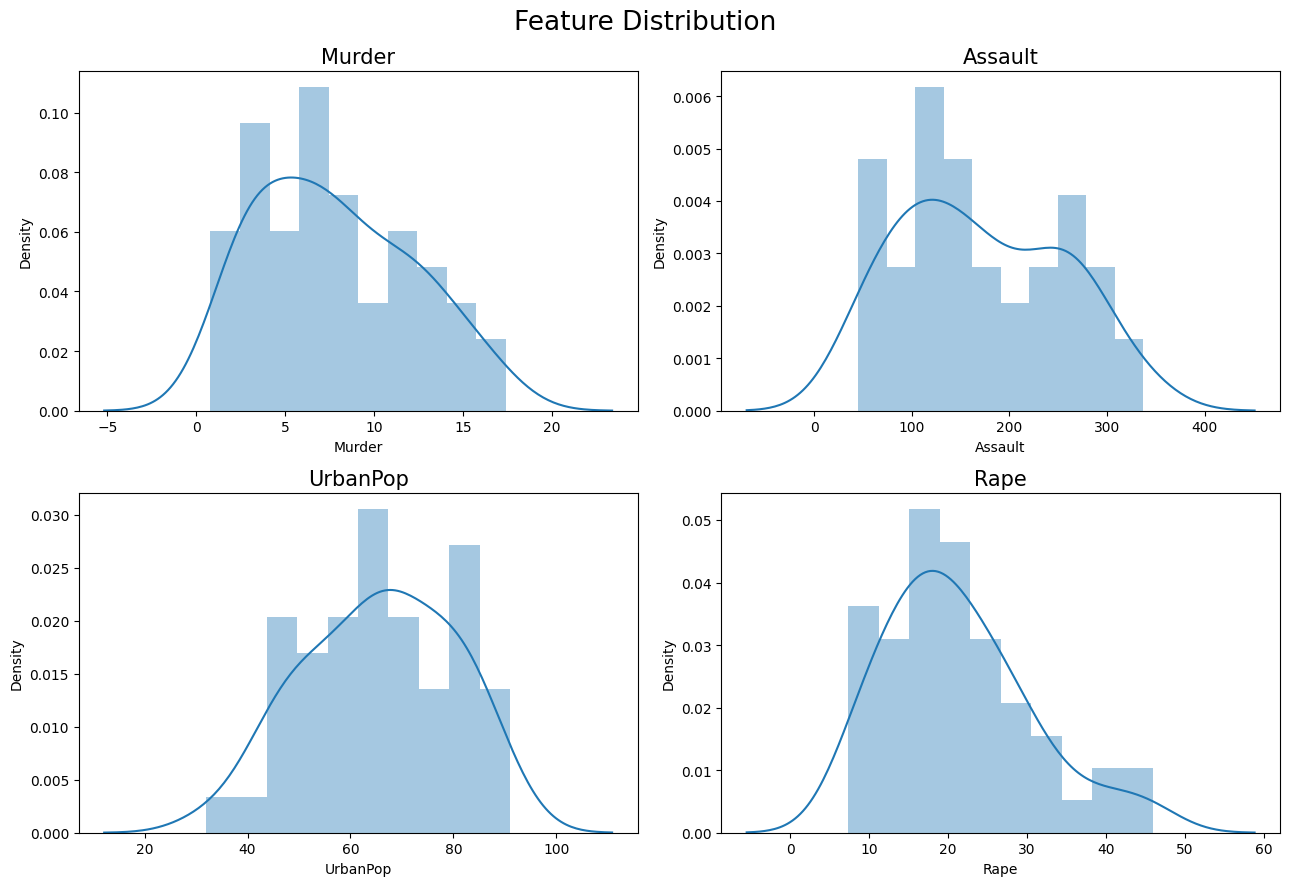

In [ ]:
f,axs=plt.subplots(2,2,figsize=(13,9))
axs=axs.ravel()
for j,i in enumerate(df.columns[1:]):
    sns.distplot(df[i],bins=10,ax=axs[j])
    axs[j].set_title(i,size=15)
plt.suptitle('Feature Distribution',size=19)
plt.tight_layout()

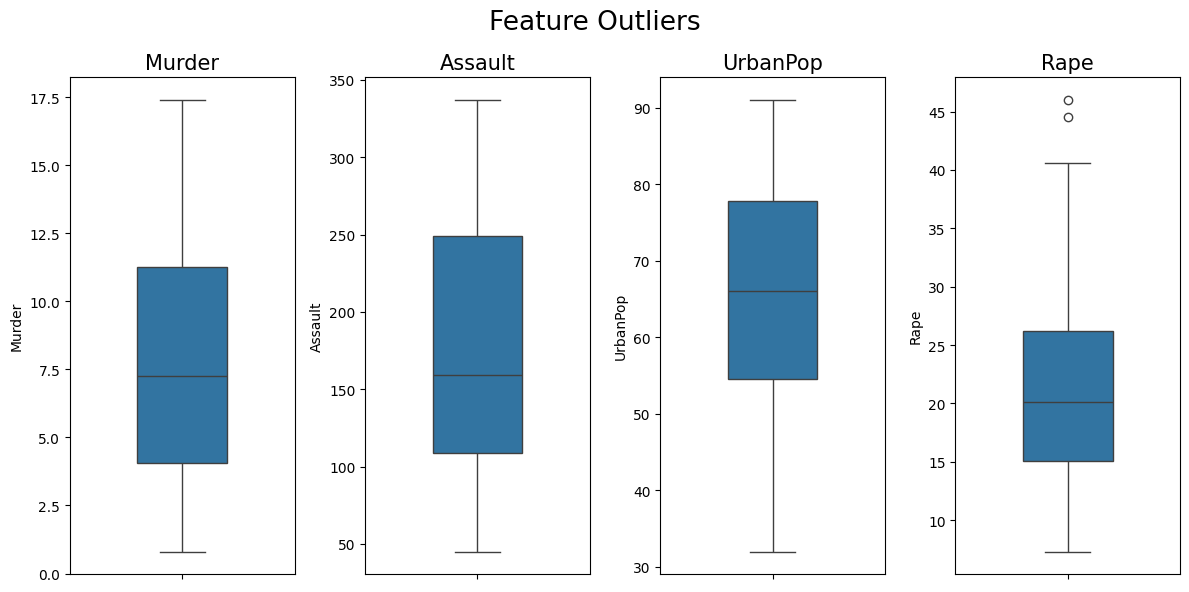

In [ ]:
f,axs=plt.subplots(1,4,figsize=(12,6))
for j,i in enumerate(df.columns[1:]):
    sns.boxplot(df[i],ax=axs[j],width=.4)
    axs[j].set_title(i,size=15)
plt.suptitle('Feature Outliers',size=19)
plt.tight_layout()

## **Handling outliers by log transforming data**

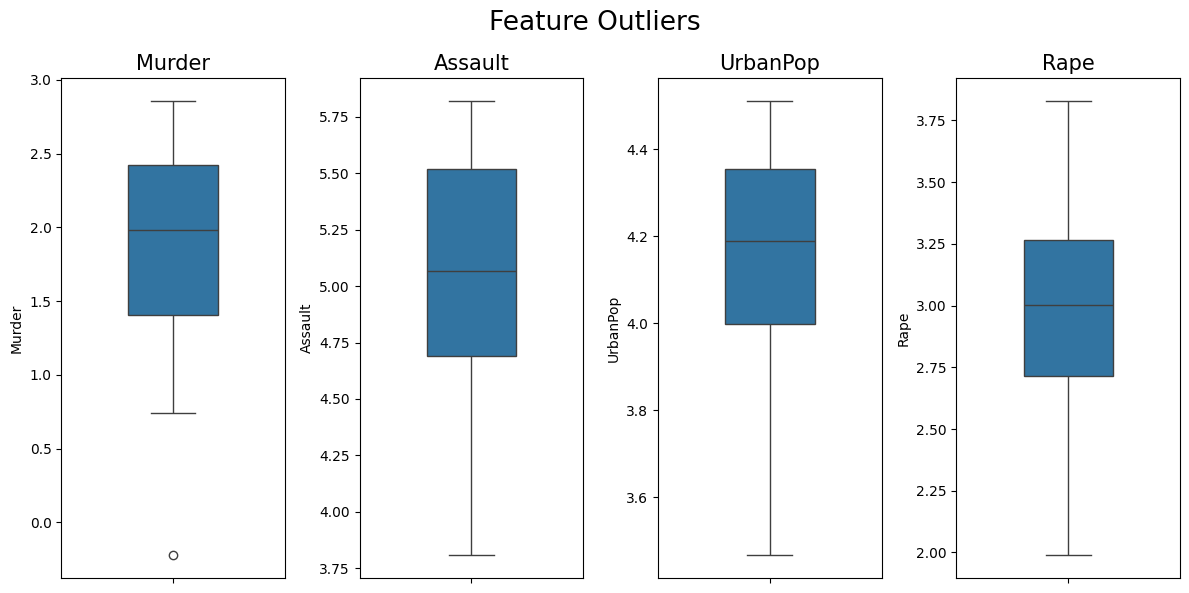

In [ ]:
data=np.log(df[df.columns[1:]])
f,axs=plt.subplots(1,4,figsize=(12,6))
for j,i in enumerate(df.columns[1:]):
    sns.boxplot(data[i],ax=axs[j],width=.4)
    axs[j].set_title(i,size=15)
plt.suptitle('Feature Outliers',size=19)
plt.tight_layout()

<Figure size 1700x700 with 0 Axes>

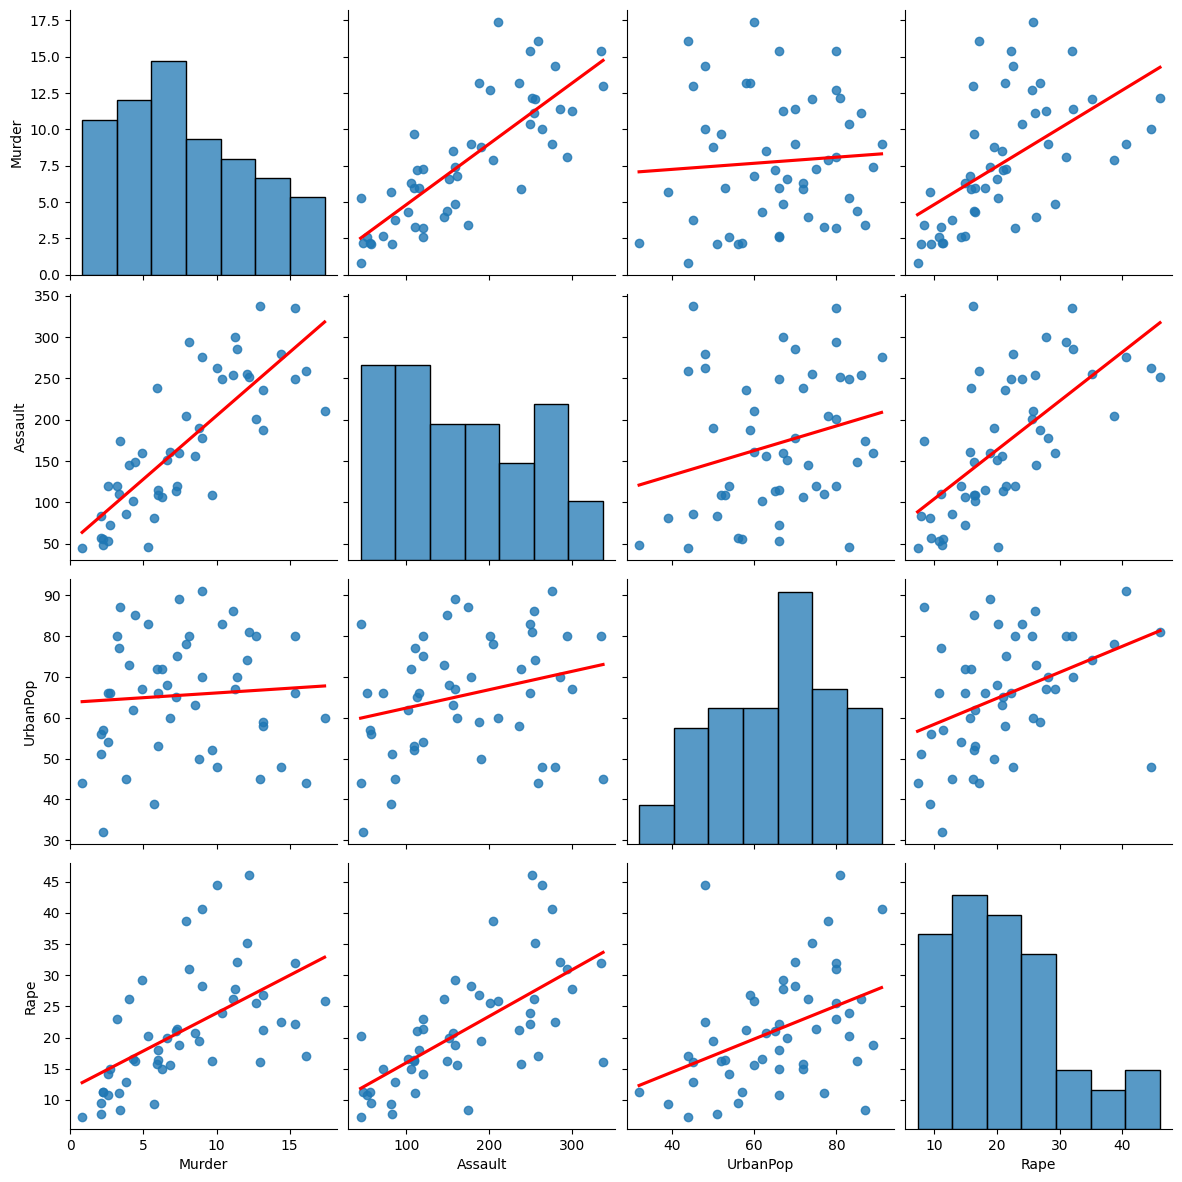

In [ ]:
plt.figure(figsize=(17,7))
sns.pairplot(df.iloc[:,1:],kind='reg',plot_kws={'ci':None,'line_kws':{'color':'red'}},height=3);



*   All feature have good correlation with each other except urban population

*   murder and assualt have good relation
*   rape and population also have linearity relation






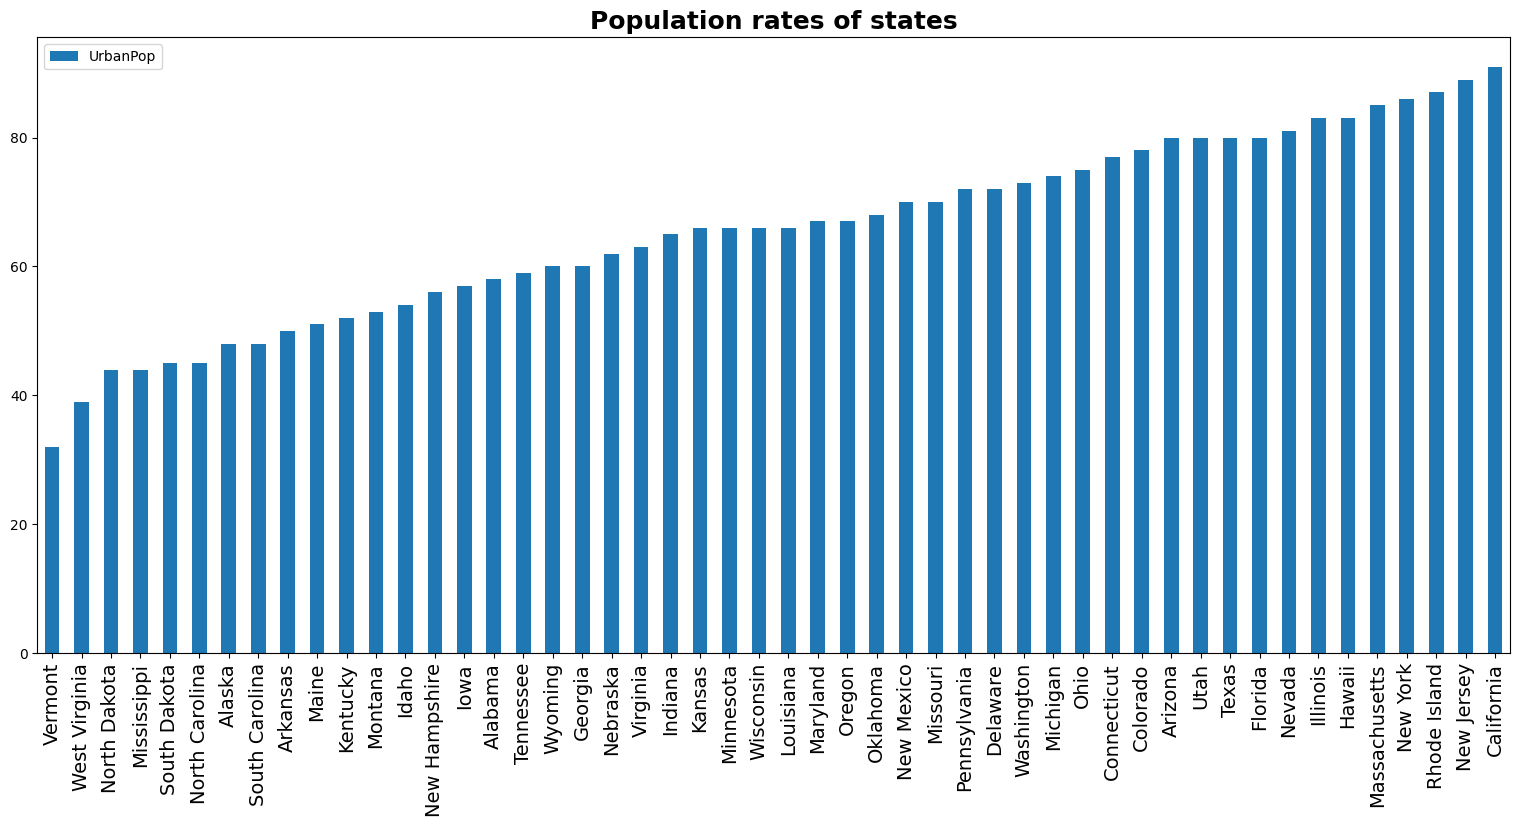

In [ ]:
data=df[['state','UrbanPop']].sort_values('UrbanPop')
data.plot(kind='bar',figsize=(19,8))
plt.xticks(range(len(data)),data.state,size=14)
plt.title('Population rates of states',size=18,fontweight='bold');

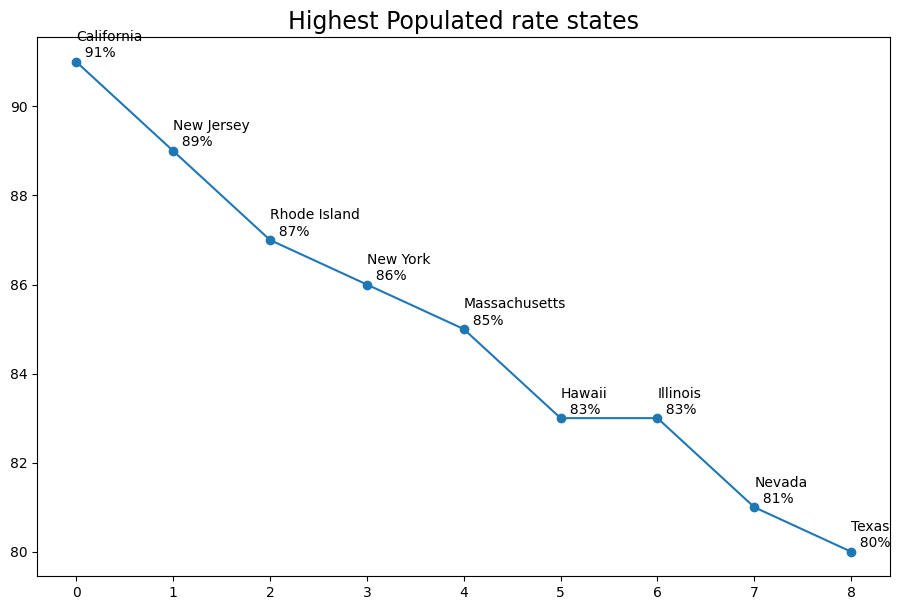

In [ ]:
a=df.sort_values('UrbanPop',ascending=False).reset_index().head(9)
plt.figure(figsize=(11,7))
a.UrbanPop.plot(kind='line',marker='o')
# plt.ylim((11,18))
plt.title("Highest Populated rate states",size=17)
for j,i in enumerate(a.state.head(9)):
    plt.text(s=i+f'\n  {a.UrbanPop[j]}%',x=j,y=a.UrbanPop[j]+.1,rotation=0)

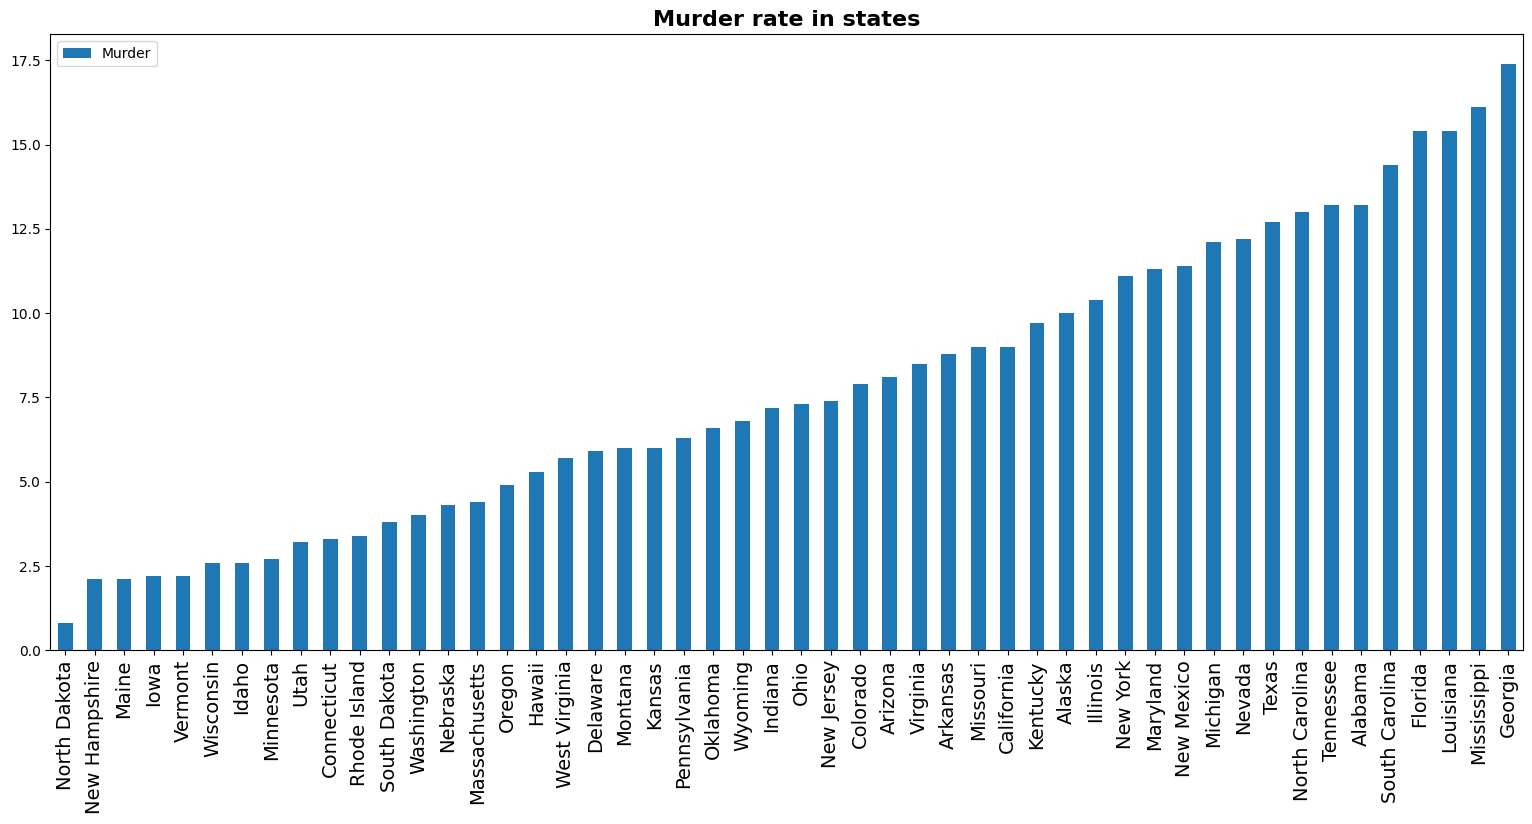

In [ ]:
data=df[['state','Murder']].sort_values('Murder')
data.plot(kind='bar',figsize=(19,8))
plt.xticks(range(len(data)),data.state,size=14)
plt.title('Murder rate in states',size=18,fontweight='bold');

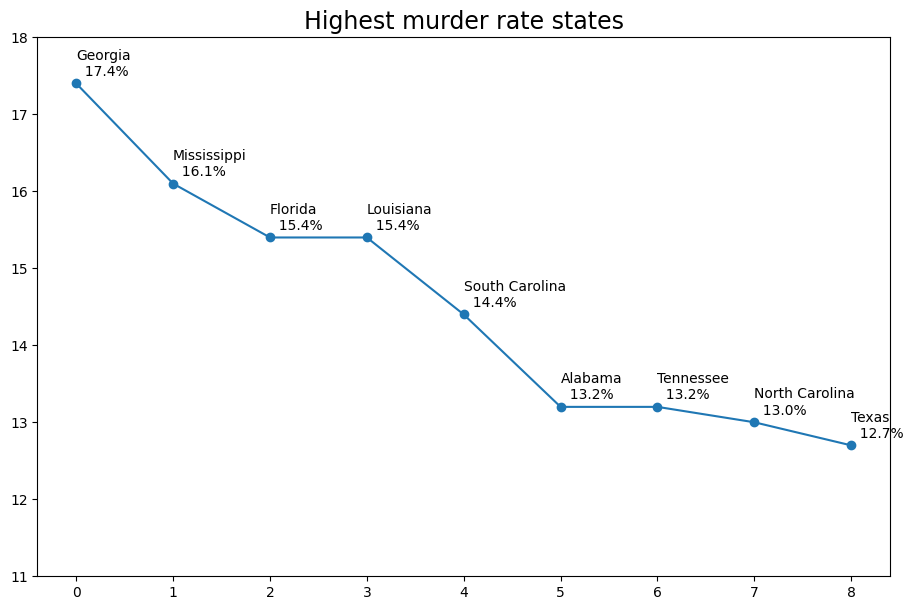

In [ ]:
a=df.sort_values('Murder',ascending=False).reset_index().head(9)
plt.figure(figsize=(11,7))
a.Murder.plot(kind='line',marker='o')
plt.ylim((11,18))
plt.title("Highest murder rate states",size=17)
for j,i in enumerate(a.state.head(9)):
    plt.text(s=i+f'\n  {a.Murder[j]}%',x=j,y=a.Murder[j]+.1,rotation=0)

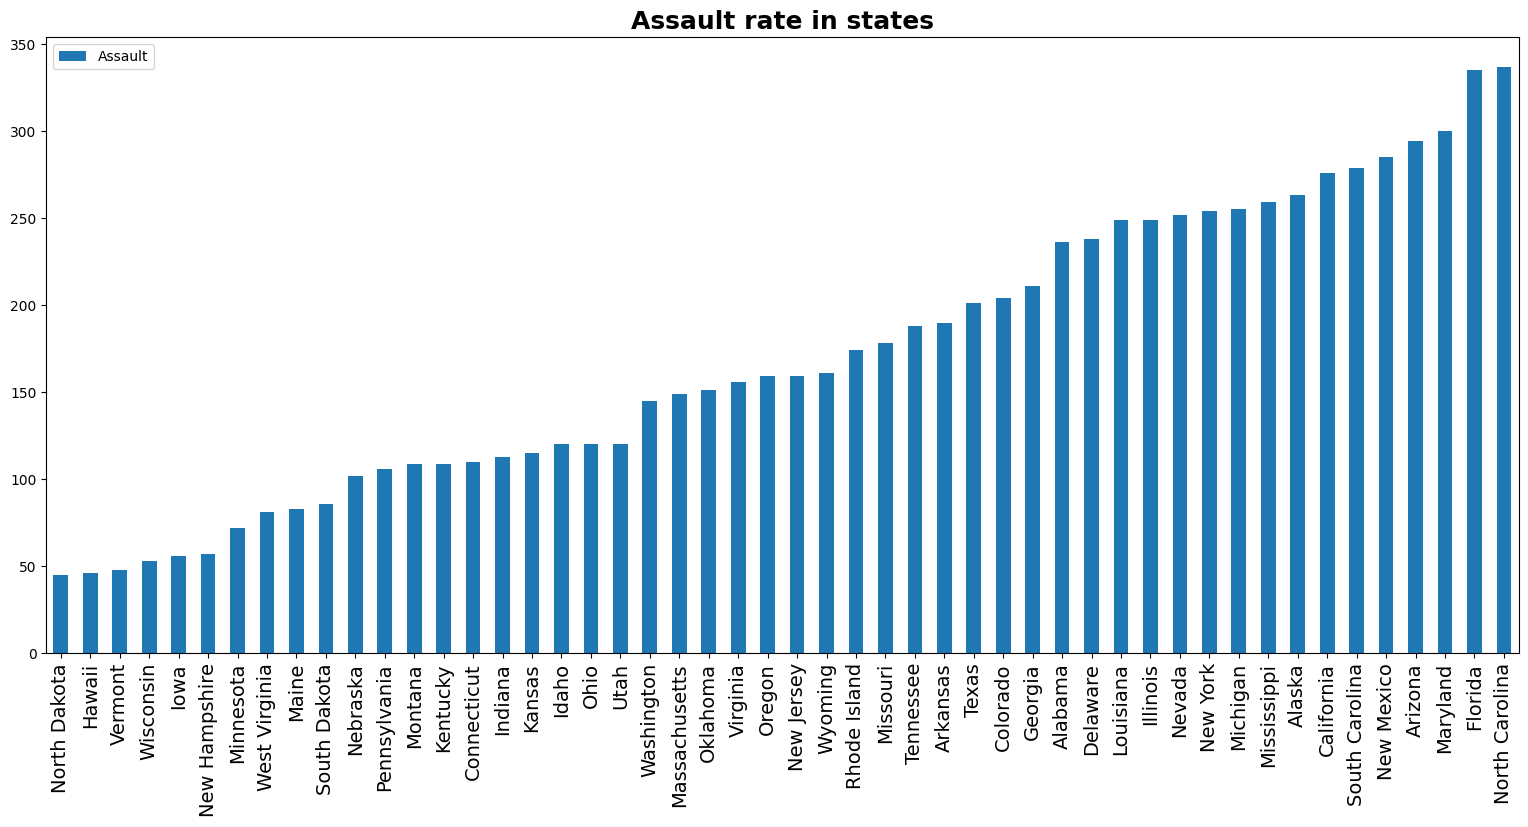

In [ ]:
data=df[['state','Assault']].sort_values('Assault')
data.plot(kind='bar',figsize=(19,8))
plt.xticks(range(len(data)),data.state,size=14)
plt.title('Assault rate in states',size=18,fontweight='bold');

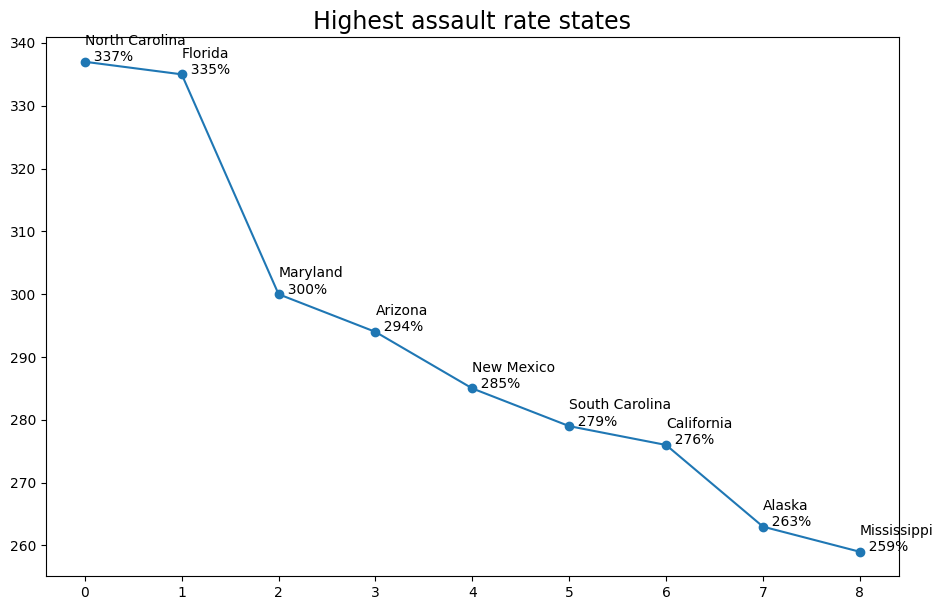

In [ ]:
a=df.sort_values('Assault',ascending=False).reset_index().head(9)
plt.figure(figsize=(11,7))
a.Assault.plot(kind='line',marker='o')
# plt.ylim((11,18))
plt.title("Highest assault rate states",size=17)
for j,i in enumerate(a.state.head(9)):
    plt.text(s=i+f'\n  {a.Assault[j]}%',x=j,y=a.Assault[j]+.1,rotation=0)

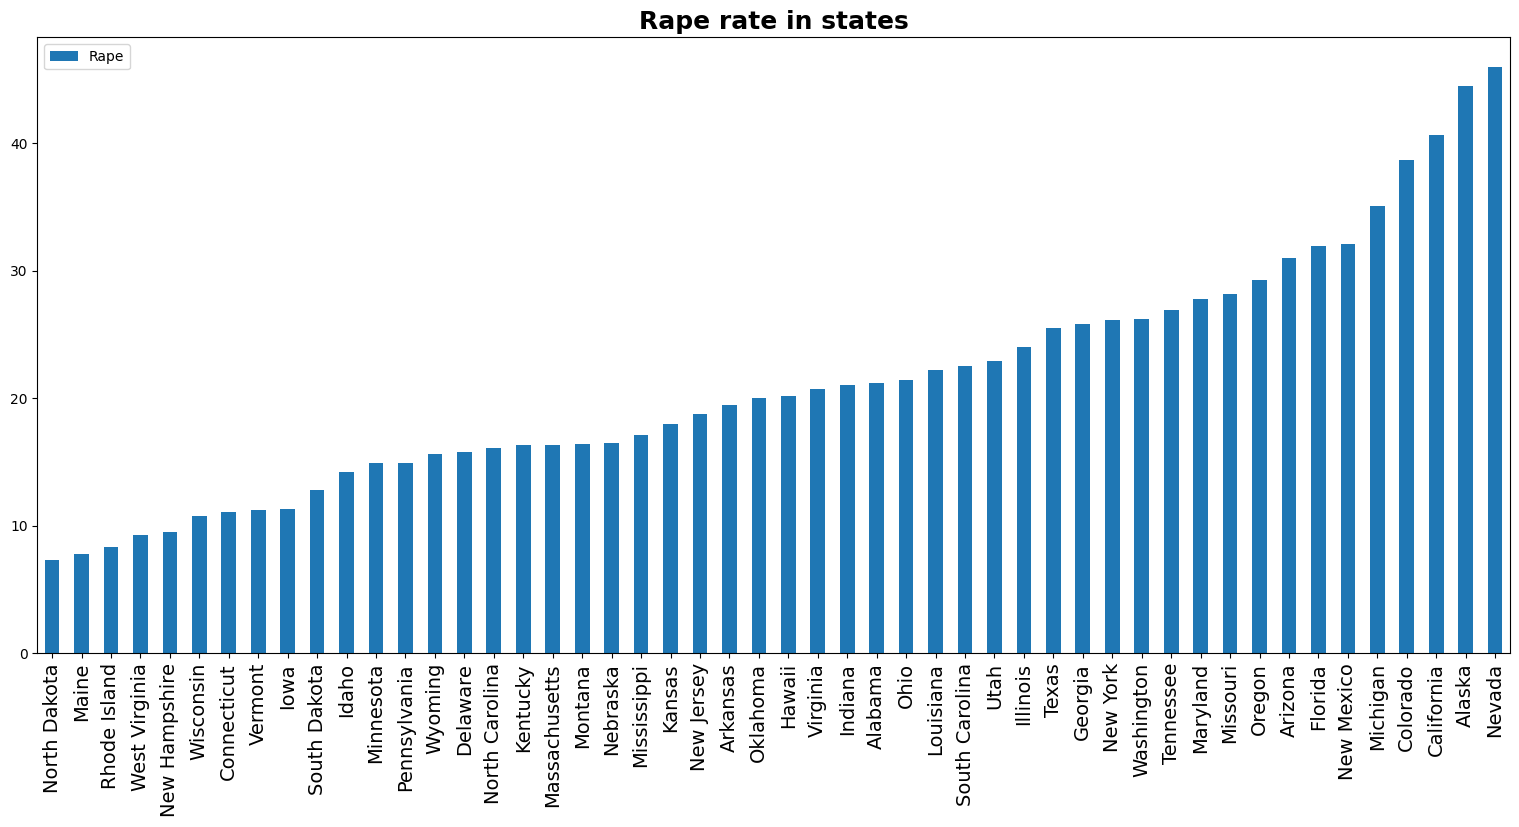

In [ ]:
data=df[['state','Rape']].sort_values('Rape')
data.plot(kind='bar',figsize=(19,8))
plt.xticks(range(len(data)),data.state,size=14)
plt.title('Rape rate in states',size=18,fontweight='bold');

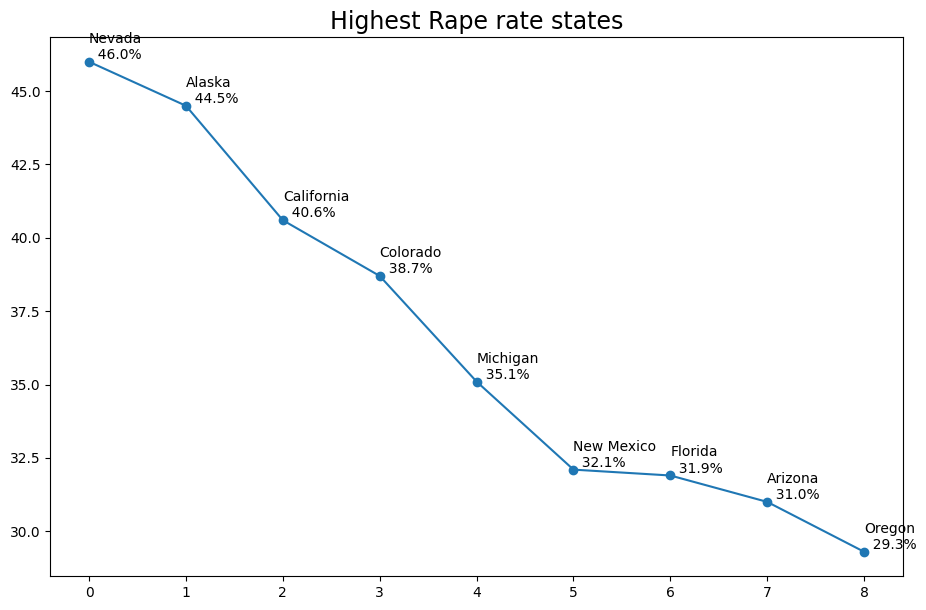

In [ ]:
a=df.sort_values('Rape',ascending=False).reset_index().head(9)
plt.figure(figsize=(11,7))
a.Rape.plot(kind='line',marker='o')
# plt.ylim((11,18))
plt.title("Highest Rape rate states",size=17)
for j,i in enumerate(a.state.head(9)):
    plt.text(s=i+f'\n  {a.Rape[j]}%',x=j,y=a.Rape[j]+.1,rotation=0)

# **Scaling Data**

In [5]:
data=df.set_index('state');
#standard scaled data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
std_data=scaler.fit_transform(data)
scaled_df=pd.DataFrame(columns=data.columns,index=data.index,data=std_data)

#minmax scaled data
minmax=MinMaxScaler()
minmax_data=minmax.fit_transform(data)
minmax_df=pd.DataFrame(columns=data.columns,index=data.index,data=minmax_data)

# **1 - Heirarchical Clustering**

## **Selecting the cluster number**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for i in range(2,10):
        model=AgglomerativeClustering(n_clusters=i)
        model.fit(std_data)
        s=silhouette_score(std_data,model.labels_)
        print("With %i cluster " %i," Silhouette-score = ",round(s*100,3))

With 2 cluster   Silhouette-score =  40.479
With 3 cluster   Silhouette-score =  31.036
With 4 cluster   Silhouette-score =  33.702
With 5 cluster   Silhouette-score =  27.311
With 6 cluster   Silhouette-score =  26.171
With 7 cluster   Silhouette-score =  26.025
With 8 cluster   Silhouette-score =  26.375
With 9 cluster   Silhouette-score =  25.51


## *  Cluster 2 has highest silhouette score

## **Selecting the linkage**

In [ ]:
for i in ['single','complete','average','ward']:
        model=AgglomerativeClustering(n_clusters=2,linkage=i)
        model.fit(std_data)
        s=silhouette_score(std_data,model.labels_)
        print(i,'linkage  --  '," Silhoutte-score = ",round(s*100,2))

single linkage  --    Silhoutte-score =  23.46
complete linkage  --    Silhoutte-score =  40.48
average linkage  --    Silhoutte-score =  40.85
ward linkage  --    Silhoutte-score =  40.48


## * single linkage has low score
## * complete, average, ward all have same score

# **Building Dendrgram**

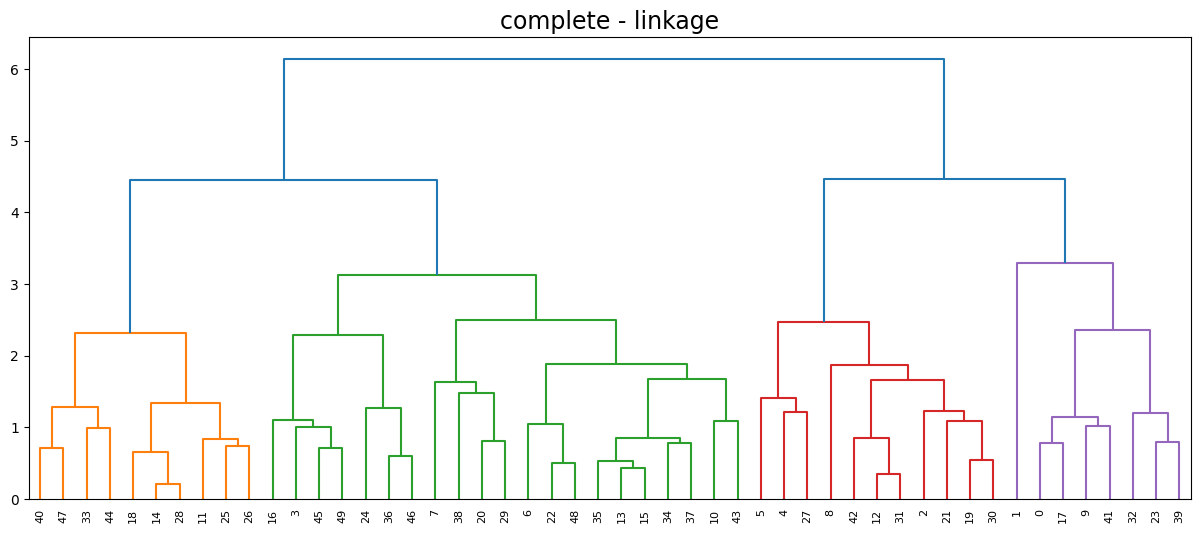

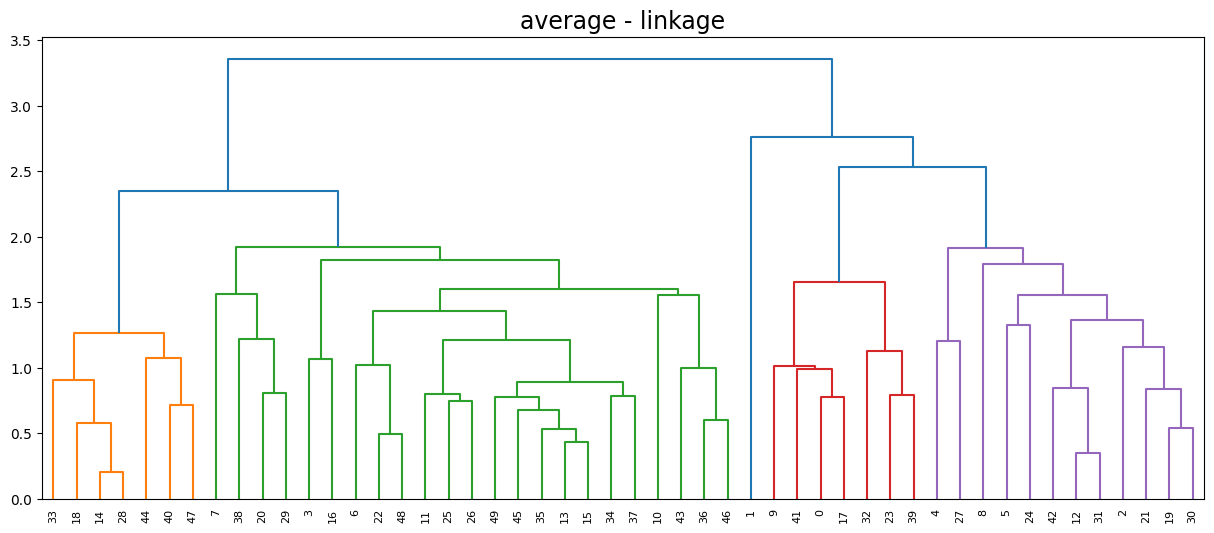

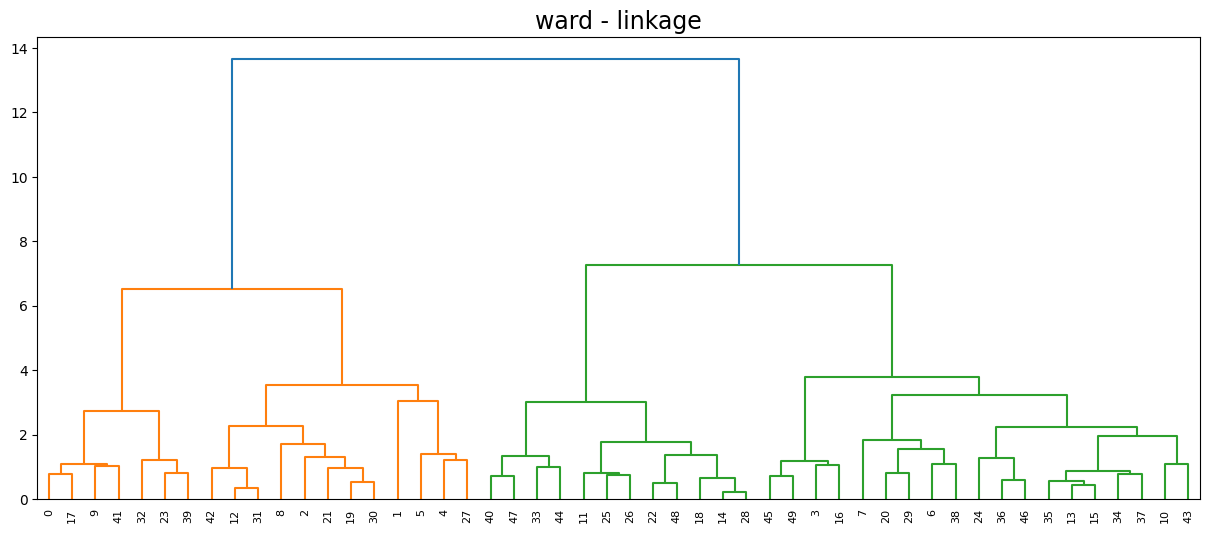

In [ ]:
import scipy.cluster.hierarchy as sch
for i in ['complete','average','ward']:
    plt.figure(figsize=(15,6))
    plt.title(f'{i} - linkage',size=17)
    sch.dendrogram(sch.linkage(std_data,method=i))
    plt.text()


## Model building using standard scaled data

In [ ]:
model=AgglomerativeClustering(n_clusters=2,linkage='ward')
model.fit(std_data)
s=silhouette_score(std_data,model.labels_)
print("\nscore : ",s,'\n\n')
data['cluster']=model.labels_
data.head()


score :  0.4047944502519567 




,Murder,Assault,UrbanPop,Rape,cluster
state,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


In [ ]:
data.cluster.value_counts()

0    31
1    19
Name: cluster, dtype: int64

Text(0.5, 0, 'Cluster')

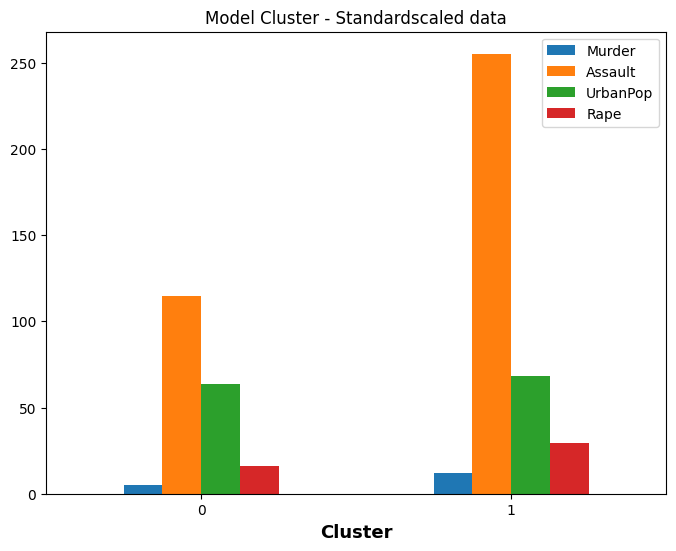

In [ ]:
data.groupby('cluster').mean().plot(kind='bar',figsize=(8,6),title='Model Cluster - Standardscaled data')
plt.xticks(rotation=0)
plt.xlabel('Cluster',fontweight='bold',size=13)

## Model building using minmax scaled data

In [ ]:
model=AgglomerativeClustering(n_clusters=2,linkage='ward')
model.fit(minmax_data)
s=silhouette_score(minmax_data,model.labels_)
print("\nscore : ",s,'\n\n')
data['cluster']=model.labels_
data.head()


score :  0.42364457559625074 




,Murder,Assault,UrbanPop,Rape,cluster
state,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


In [ ]:
data.cluster.value_counts()

0    30
1    20
Name: cluster, dtype: int64

Text(0.5, 0, 'Cluster')

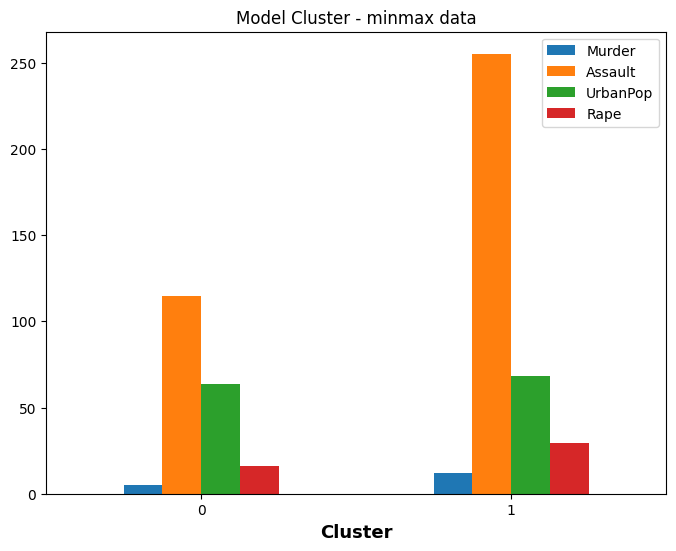

In [ ]:
data.groupby('cluster').mean().plot(kind='bar',figsize=(8,6),title='Model Cluster - minmax data')
plt.xticks(rotation=0)
plt.xlabel('Cluster',fontweight='bold',size=13)

# insight

*     ## **States in the cluster 0 are safer  having low murder , assault and rape rate**
*    ## **States in the cluster 1 are dangerous  having high murder , assault and rape rate**





---


# **2 - Kmeans clustering**

## Kmeans on Standard scaled data
###**Finding cluster number**

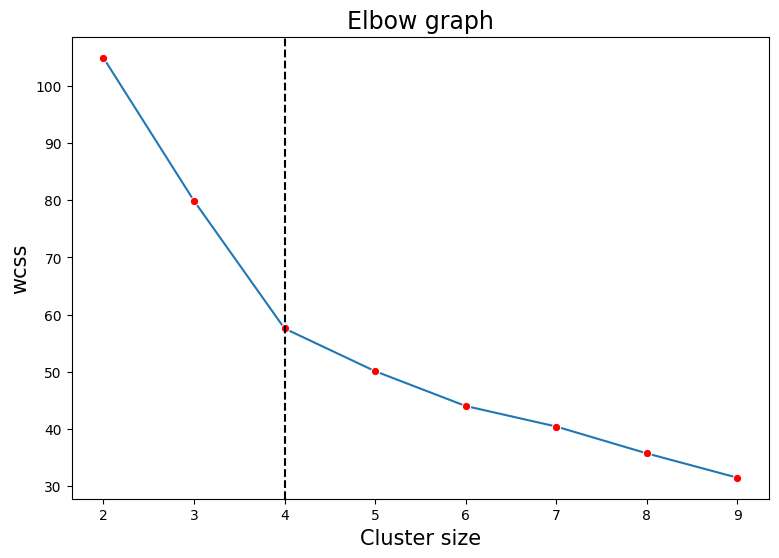

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
wcss=[]
for i in range(2,10):
    model=KMeans(n_clusters=i,random_state=5)
    model.fit(std_data)
    s=silhouette_score(std_data,model.labels_)
    wcss.append(model.inertia_)
plt.figure(figsize=(9,6))
sns.lineplot(x=range(2,10),y=wcss,marker='o',markerfacecolor='r',)
plt.title('Elbow graph',size=17)
plt.xlabel('Cluster size',size=15)
plt.ylabel('wcss',size=15)
plt.axvline(x=4,ls='--',color='black');

**---> From the graph , at point 4 elbow is visible**

## **Analysing silhouette score**

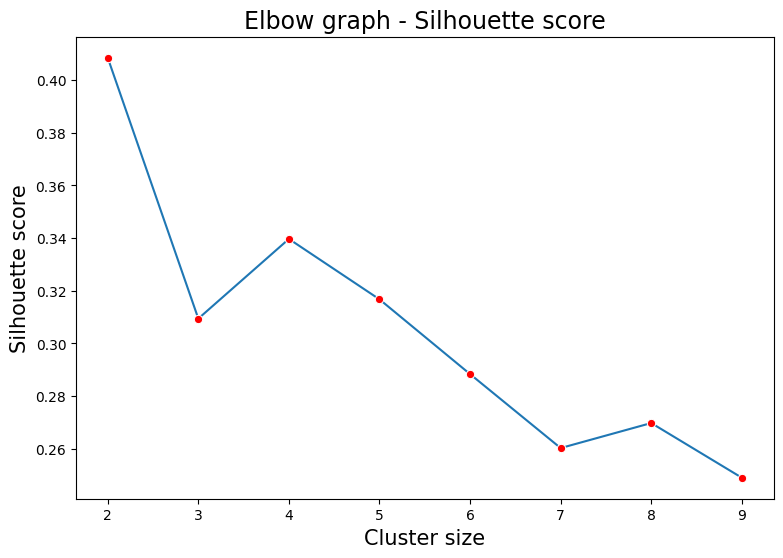

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,10):
    model=KMeans(n_clusters=i,random_state=5)
    model.fit(std_data)
    s=silhouette_score(std_data,model.labels_)
    wcss.append(s)
plt.figure(figsize=(9,6))
sns.lineplot(x=range(2,10),y=wcss,marker='o',markerfacecolor='r',)
plt.title('Elbow graph - Silhouette score',size=17)
plt.xlabel('Cluster size',size=15)
plt.ylabel('Silhouette score',size=15);

## **By analysing both wcss and silhouette score , at cluster 4 wcss is great and score is bit increasing.</br>lets Build model taking k=4**

In [ ]:
data=df.copy()
model=KMeans(n_clusters=4,random_state=9)
model.fit(std_data)
data['cluster']=model.labels_
data.cluster.value_counts()

2    16
1    13
0    13
3     8
Name: cluster, dtype: int64

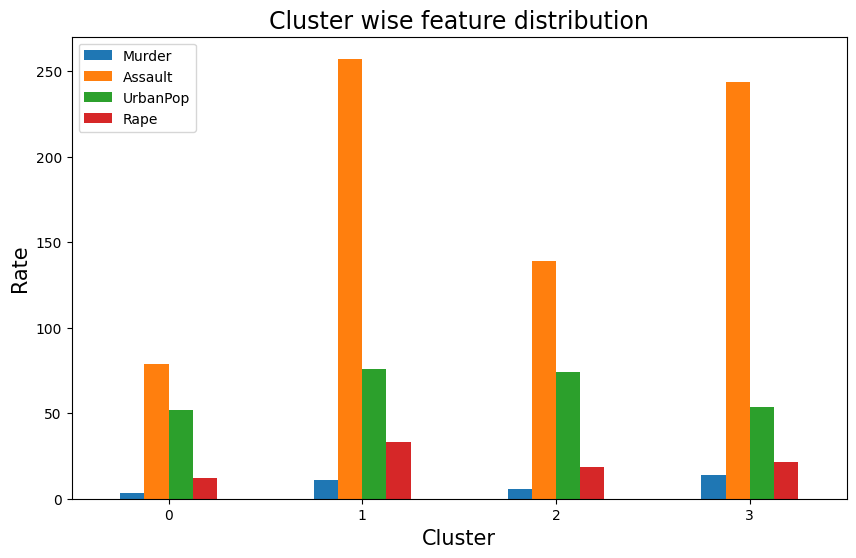

In [ ]:
data.groupby('cluster').mean().plot(kind='bar',figsize=(10,6))
plt.xlabel('Cluster',size=15)
plt.xticks(rotation=0)
plt.ylabel('Rate',size=15)
plt.title('Cluster wise feature distribution',size=17);


##**Plotting model within feature 1 and feature 2 space (2D)**

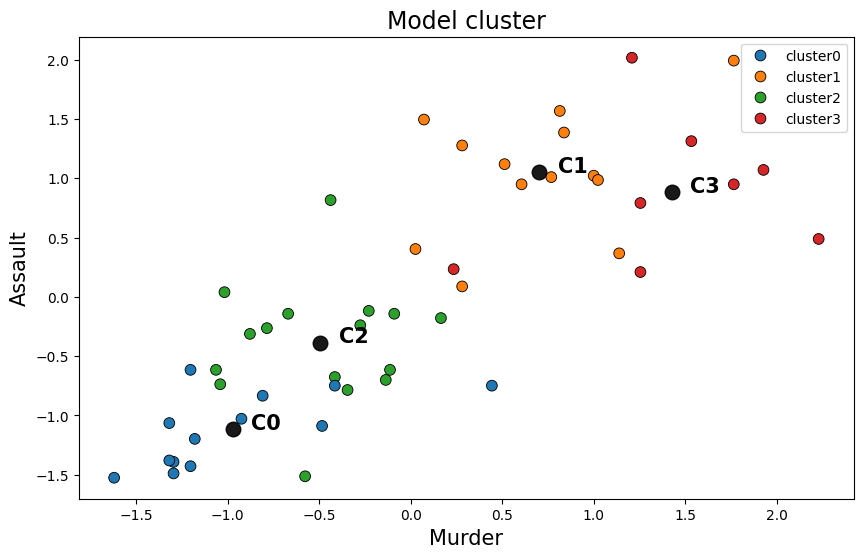

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(x=scaled_df.Murder,y=scaled_df.Assault,hue=np.array(data.cluster),s=60,palette='tab10',ec='black')
c=model.cluster_centers_
plt.scatter(x=c[:,0],y=c[:,1],c='black',s=110,alpha=.9)
for j,i in enumerate(c):
    plt.text(x=i[0]+0.1,y=i[1],s='C'+str(j),fontweight='bold',size=15)
plt.xlabel('Murder',size=15)
plt.ylabel('Assault',size=15)
plt.title('Model cluster',size=17)
for j,i in enumerate(ax.legend_.texts):
    i.set_text('cluster'+str(j))


**Note that the clusters are not seperated clearly, because the graph is plotted in 'Murder' and 'assault' space only**

## **Model in 3D space (Murder - Assault - Rape)**

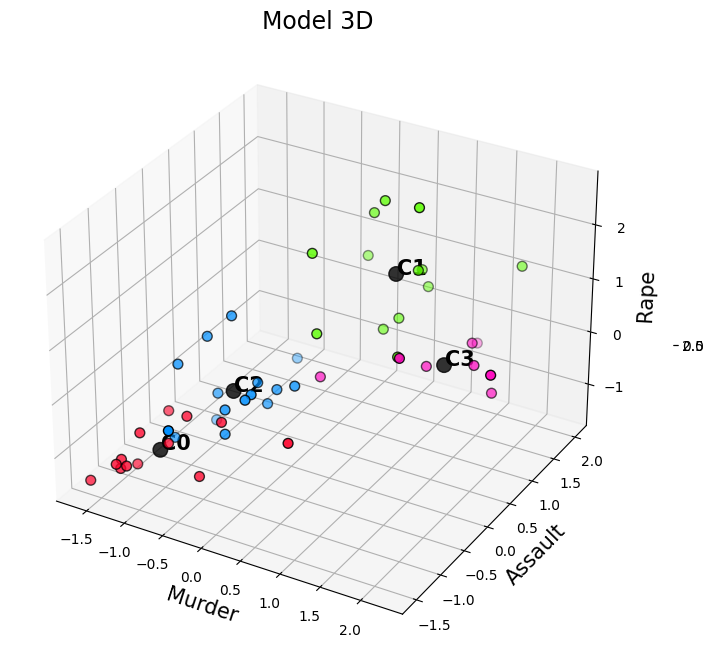

In [ ]:
from mpl_toolkits import mplot3d
fig=plt.figure(figsize=(12,8))
ax=plt.axes(projection='3d')
f=ax.scatter3D(xs=scaled_df.Murder,ys=scaled_df.Assault,ec='black',zs=scaled_df.Rape,c=data.cluster,cmap='gist_rainbow',s=50)
c=model.cluster_centers_
ax.scatter3D(xs=c[:,0],ys=c[:,1],zs=c[:,3],c='black',s=110,alpha=.8)
for j,i in enumerate(c):
    ax.text(x=i[0]+0.01,y=i[1],z=i[3],s='C'+str(j),fontweight='bold',size=15)
ax.set_xlabel('Murder',size=15)
ax.set_ylabel('Assault',size=15)
ax.set_zlabel('Rape ',size=15)
fig.colorbar(f, ax = ax, shrink = 0, aspect = 5)
plt.title('Model 3D',size=17);

## To understand the feature seperation among each cluster

Text(0.5, 1.0, 'Cluster wise Murder distribution')

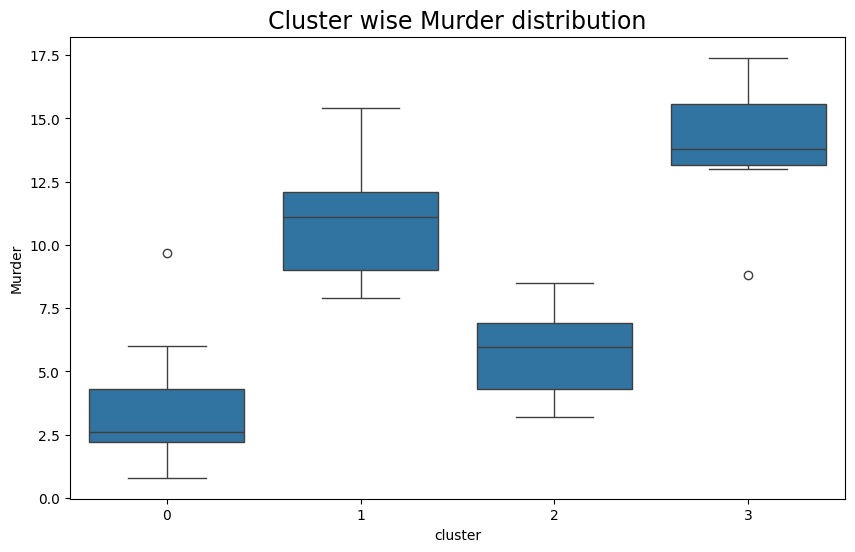

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Murder',x='cluster',data=data)
plt.title('Cluster wise Murder distribution',size=17);

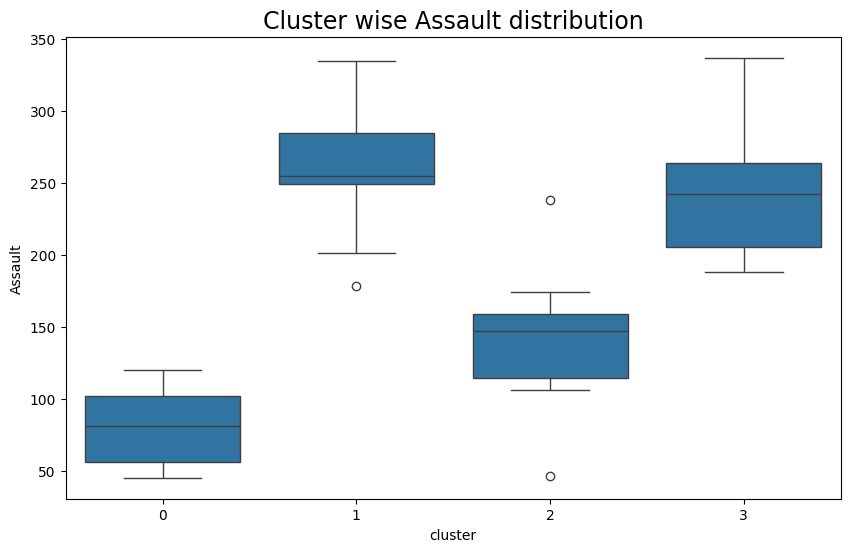

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Assault',x='cluster',data=data)
plt.title('Cluster wise Assault distribution',size=17);

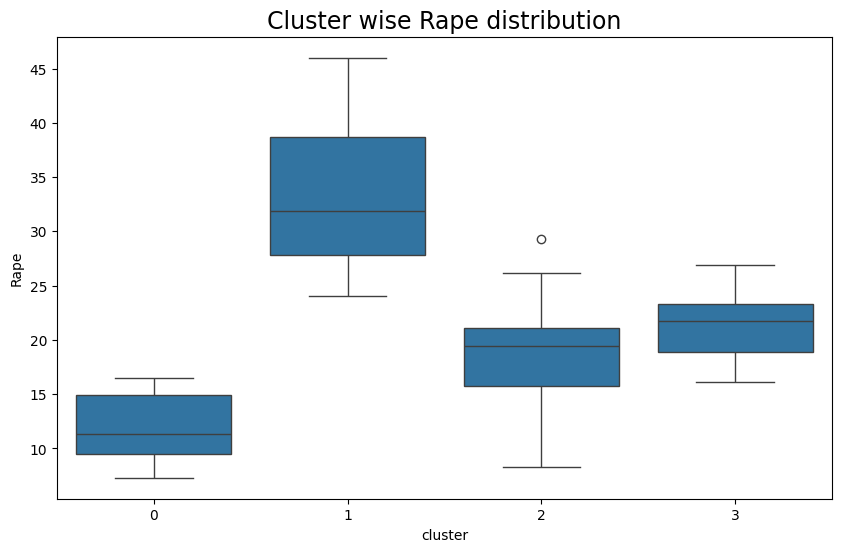

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Rape',x='cluster',data=data)
plt.title('Cluster wise Rape distribution',size=17);

# **Silhouette graph**

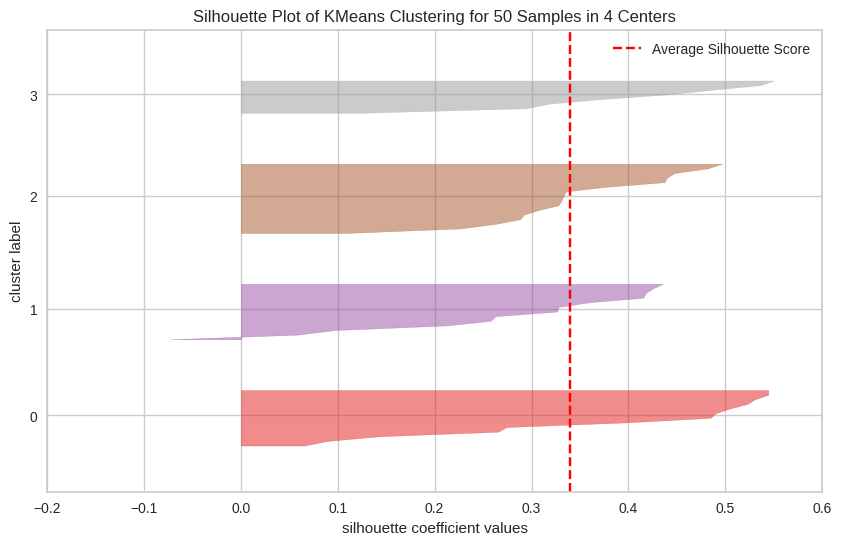


Silhouette score of the model :  0.34


In [ ]:
from yellowbrick.cluster import silhouette_visualizer
plt.figure(figsize=(10,6))
silhouette_visualizer(model,std_data);
s=silhouette_score(std_data,model.labels_)
print('\nSilhouette score of the model : ',round(s,3))

# **insights :**

* **4 cluster in the increasing order of rates**
*   **cluster 0 and cluster 2 are safer having less feature rates.**
*   **cluster 1 and cluster 3 are dangerous having high feature rates**
* **safety decreasing order
: cluster 0 > cluster 2 > cluster 1 > cluster 3**

# **KMeans model on minmax scaled data**

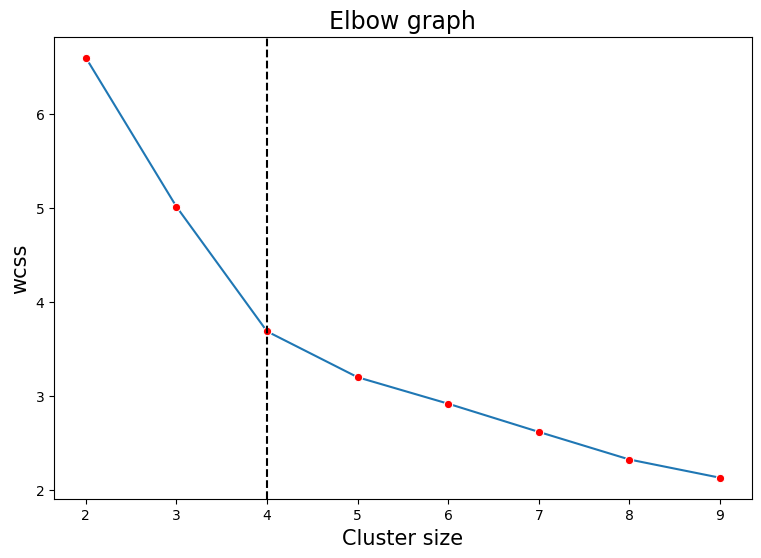

In [ ]:
# using minmax data
wcss=[]
for i in range(2,10):
    model=KMeans(n_clusters=i,random_state=7)
    model.fit(minmax_data)
    s=silhouette_score(minmax_data,model.labels_)
    wcss.append(model.inertia_)
plt.figure(figsize=(9,6))
sns.lineplot(x=range(2,10),y=wcss,marker='o',markerfacecolor='r',)
plt.title('Elbow graph',size=17)
plt.xlabel('Cluster size',size=15)
plt.ylabel('wcss',size=15)
plt.axvline(x=4,ls='--',color='black');

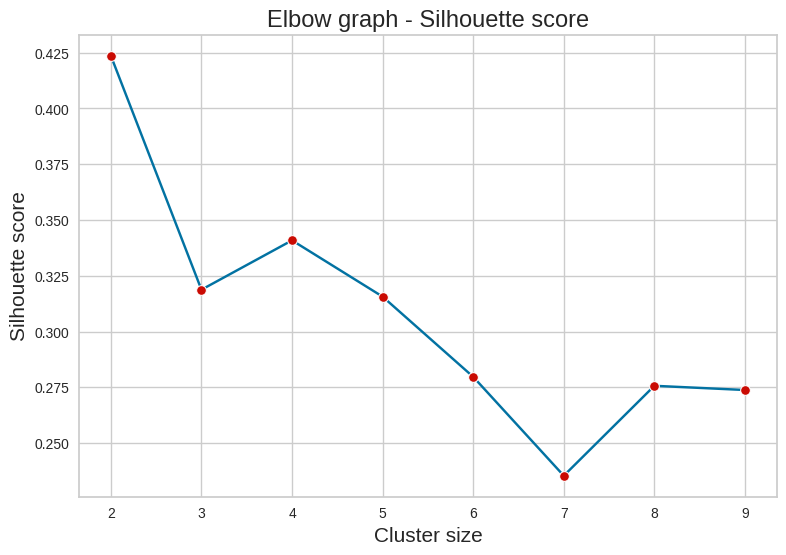

In [ ]:
wcss=[]
for i in range(2,10):
    model=KMeans(n_clusters=i,random_state=7)
    model.fit(minmax_data)
    s=silhouette_score(minmax_data,model.labels_)
    wcss.append(s)
plt.figure(figsize=(9,6))
sns.lineplot(x=range(2,10),y=wcss,marker='o',markerfacecolor='r',)
plt.title('Elbow graph - Silhouette score',size=17)
plt.xlabel('Cluster size',size=15)
plt.ylabel('Silhouette score',size=15);

# model building on k=3

In [ ]:
data=df.copy()
model=KMeans(n_clusters=3,random_state=7)
model.fit(minmax_data)
data['cluster']=model.labels_
data.cluster.value_counts()

2    19
1    18
0    13
Name: cluster, dtype: int64

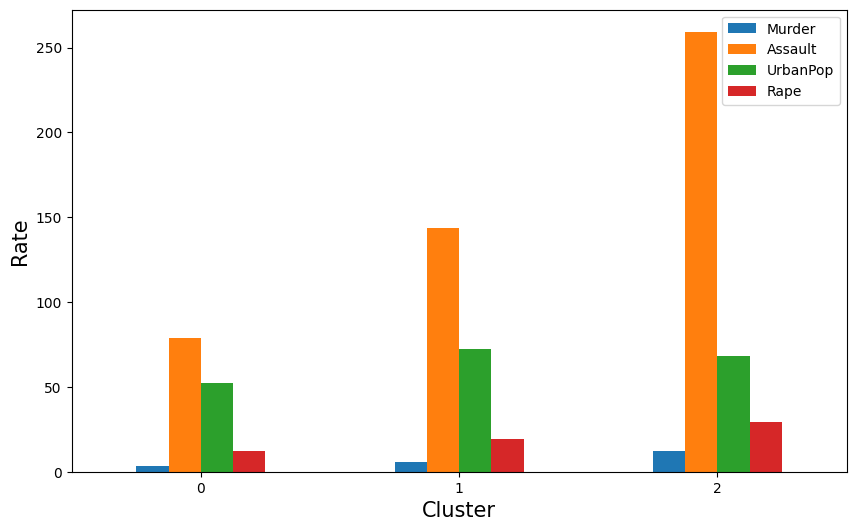

In [ ]:
data.groupby('cluster').mean().plot(kind='bar',figsize=(10,6))
plt.xlabel('Cluster',size=15)
plt.xticks(rotation=0)
plt.ylabel('Rate',size=15);

## **2D Model Cluster View**

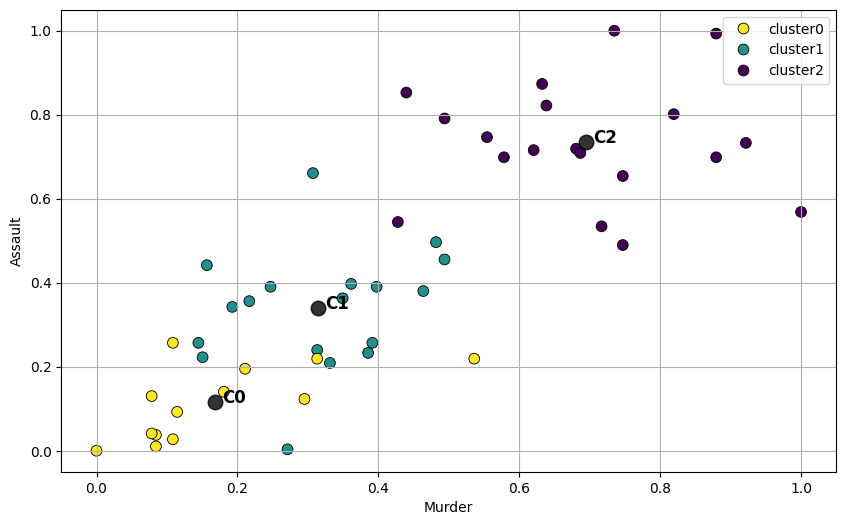

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(x=minmax_df.Murder,y=minmax_df.Assault,ec='black',hue=np.array(data.cluster),palette='viridis_r',s=60)
c=model.cluster_centers_
plt.scatter(x=c[:,0],y=c[:,1],c='black',s=110,alpha=.8)
for j,i in enumerate(c):
    plt.text(x=i[0]+0.01,y=i[1],s='C'+str(j),fontweight='bold',size=12)
for j,i in enumerate(ax.legend_.texts):
    i.set_text('cluster'+str(j))
plt.grid()

# **3D Model cluster view**

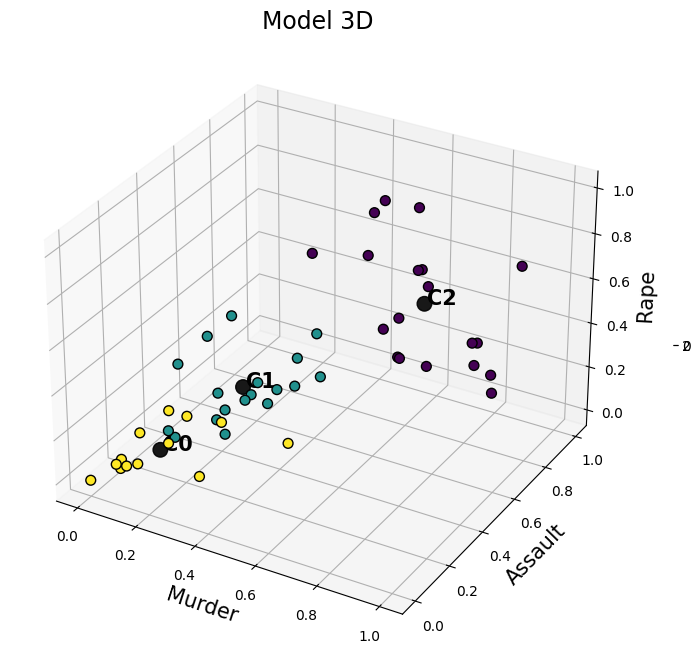

In [ ]:
from mpl_toolkits import mplot3d
fig=plt.figure(figsize=(12,8))
ax=plt.axes(projection='3d')
f=ax.scatter3D(xs=minmax_df.Murder,ys=minmax_df.Assault,depthshade=False,ec='black',zs=minmax_df.Rape,c=data.cluster,cmap='viridis_r',s=50)
c=model.cluster_centers_
ax.scatter3D(xs=c[:,0],ys=c[:,1],zs=c[:,3],c='black',s=110,alpha=.9)
for j,i in enumerate(c):
    ax.text(x=i[0]+0.01,y=i[1],z=i[3],s='C'+str(j),fontweight='bold',size=15)
ax.set_xlabel('Murder',size=15)
ax.set_ylabel('Assault',size=15)
ax.set_zlabel('Rape ',size=15)
fig.colorbar(f, ax = ax, shrink = 0, aspect = 5)
plt.title('Model 3D',size=17);

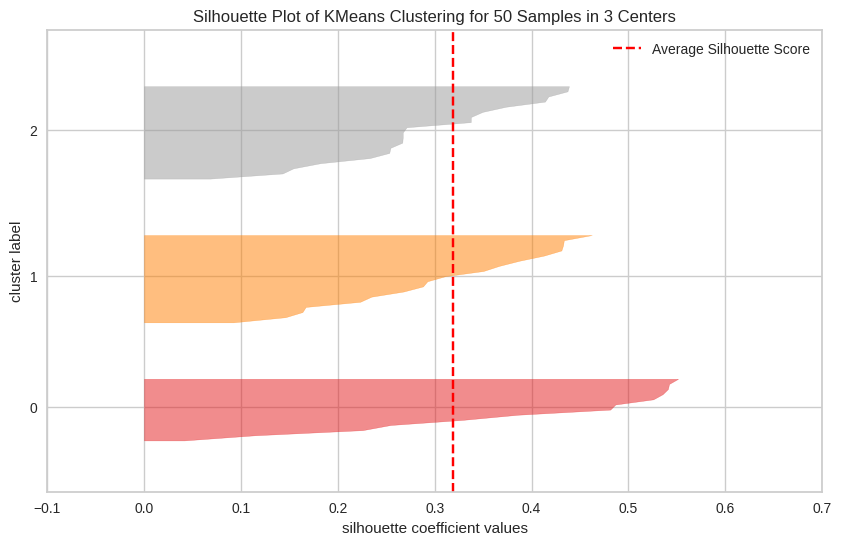


Silhouette score of the model :  0.31


In [ ]:
from yellowbrick.cluster import silhouette_visualizer
plt.figure(figsize=(10,6))
silhouette_visualizer(model,minmax_data);
s=silhouette_score(std_data,model.labels_)
print('\nSilhouette score of the model : ',round(s,3))

# **Insights :**


*   **cluster 0 is safer among all groups.**
*   **cluster 1 is intermediate zone having feature rates in between both cluster**
* **Cluster 3 is most dangerous among the states**



---



# **3 - DBSCAN**

## **Calculating optimal distance value(epsilon) and minimum number of data points**

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
eps = np.arange(0.25,2,0.2)
min_samples = np.arange(1,3)
DBSCAN_params = list(product(eps, min_samples))
no_of_clusters = []
sil_score = []
for p in DBSCAN_params:
    model = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_data)
    no_of_clusters.append(len(np.unique(model.labels_)))
    sil_score.append(silhouette_score(std_data, model.labels_))

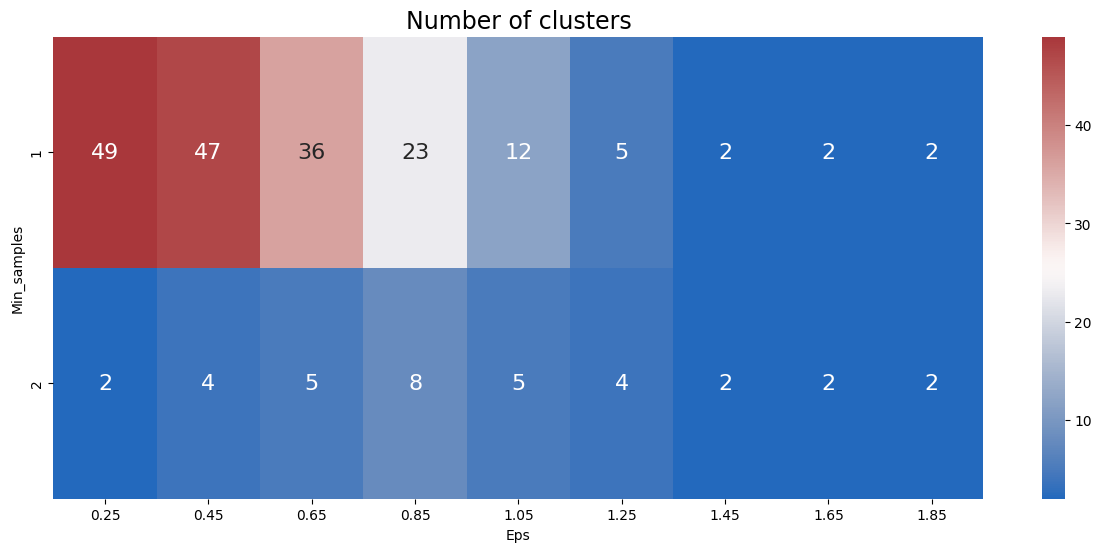

In [7]:
tmp = pd.DataFrame(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp.Eps=tmp.Eps.round(4)
tmp['No_of_clusters'] = no_of_clusters
tmp['sil_score'] = sil_score

table = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(table, annot=True,annot_kws={"size": 16}, cmap="vlag", ax=ax)
ax.set_title('Number of clusters',size=17);

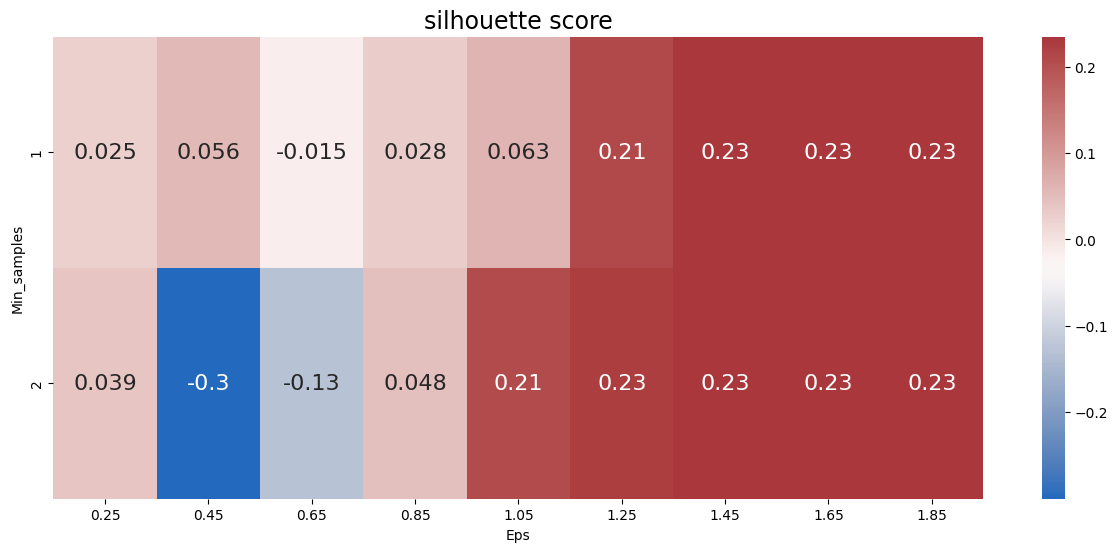

In [ ]:
table = pd.pivot_table(tmp, values='sil_score', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(table, annot=True,annot_kws={"size": 16}, cmap="vlag", ax=ax)
ax.set_title('silhouette score',size=17);

## **conclusion**


*  **By analysing the silhouette score ,the maximum score is 23.**
*   **By considering cluster numbers, the optimum value for epsilon is 1.25 and minimum samples required is 2.**


## Buliding the model

In [25]:
db = DBSCAN(min_samples =2, eps =1.25).fit(std_data)
db.labels_

array([ 0, -1,  1,  1,  2,  1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  2,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1])

**Data is separated into 3 clusters and noise**

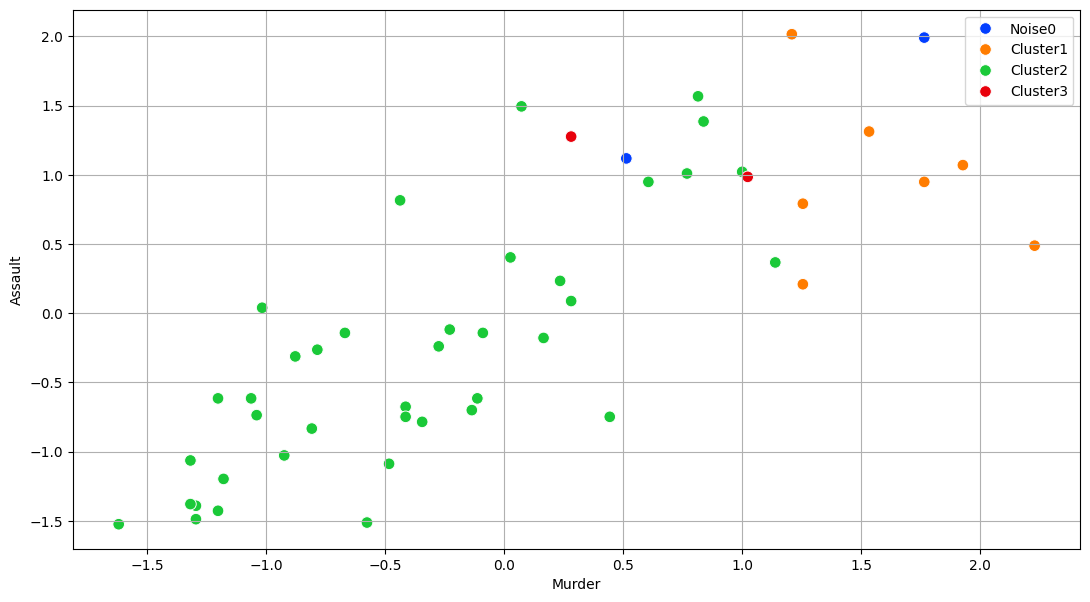

In [44]:
plt.figure(figsize=(13,7))
ax=sns.scatterplot(data=scaled_df,x='Murder',y='Assault',hue=db.labels_,s=70,palette='bright')
plt.grid()
g='Noise'
for j,i in enumerate(ax.legend_.texts):
    i.set_text(g+str(j))
    g='Cluster'

In [63]:
import plotly.express as plx
scaled_df['cluster']=db.labels_
plx.scatter_3d(scaled_df,x='Murder',y='Assault',z='Rape',color='cluster',width=1000,title='Model Clusters').show()

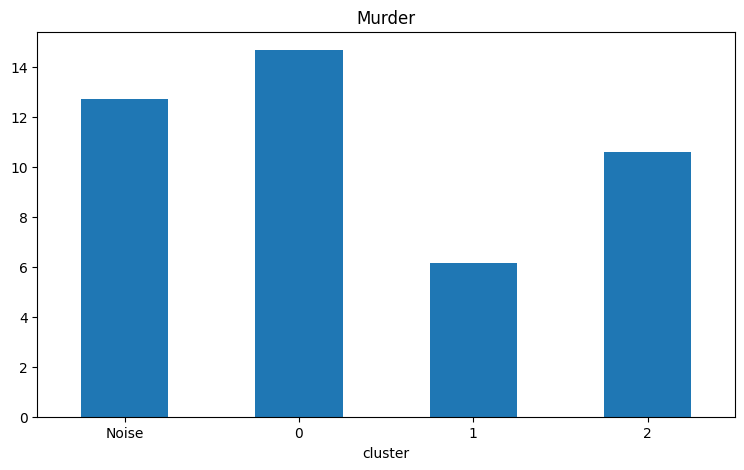

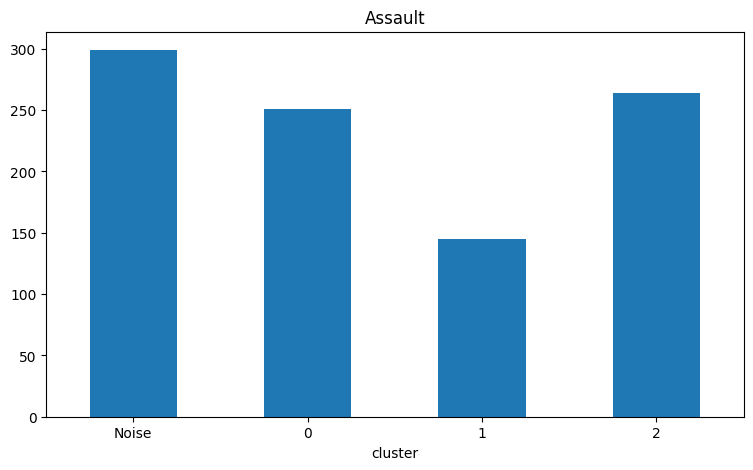

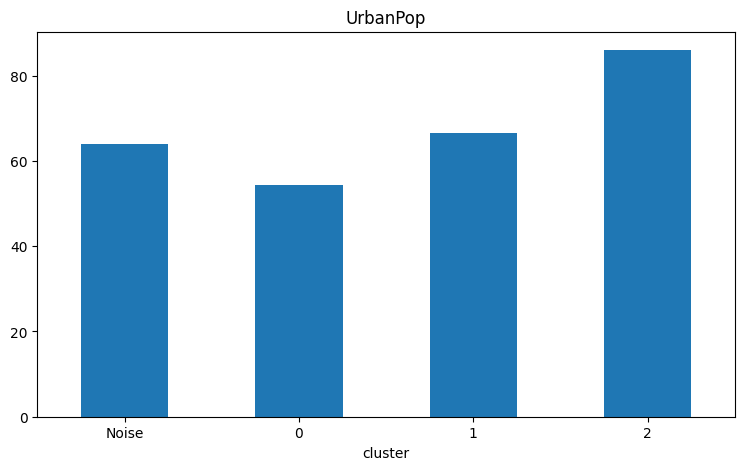

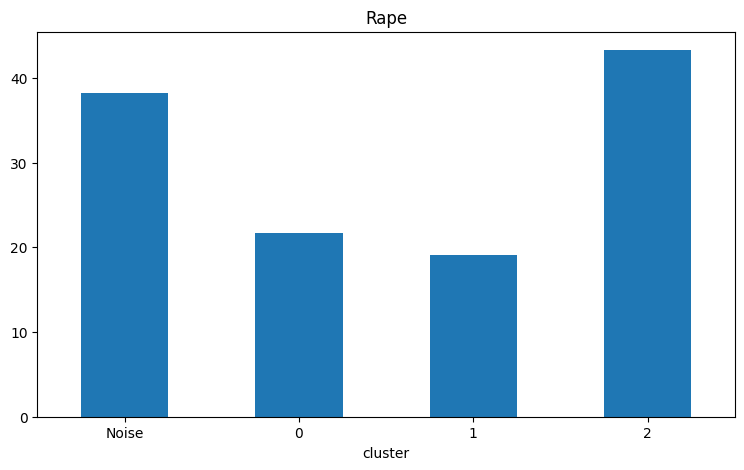

In [87]:
data=df.copy()
data['cluster']=db.labels_
for i in data.iloc[:,1:-1]:
    plt.figure(figsize=(9,5))
    data.groupby('cluster')[i].mean().plot.bar(title=i)
    plt.xticks([0,1,2,3],labels=['Noise',0,1,2],rotation=0)

# **Finding the maximum silhouette score**

In [89]:
sil_avg = []
max_value = 0
result=[]

for i in np.arange(0.2,2,0.2):
    for j in np.arange(1,3):
        db = DBSCAN(min_samples = j, eps =i).fit(std_data)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        if n_clusters_>1:
            try:
                silhouette_avg = silhouette_score(std_data, labels)
            except:
                continue
            if silhouette_avg > max_value:
                result=[i, j, n_clusters_, silhouette_avg,n_noise]
                max_value=silhouette_avg
print("epsilon=", result[0],
      "\nmin_sample=", result[1],
      "\nnumber of clusters=", result[2],
      "\naverage silhouette score= " , result[3],
      '\nnoise =',result[4])

epsilon= 1.2 
min_sample= 2 
number of clusters= 2 
average silhouette score=  0.2677430171383357 
noise = 5


### Building model according to highest score

Text(0.5, 1.0, 'Model')

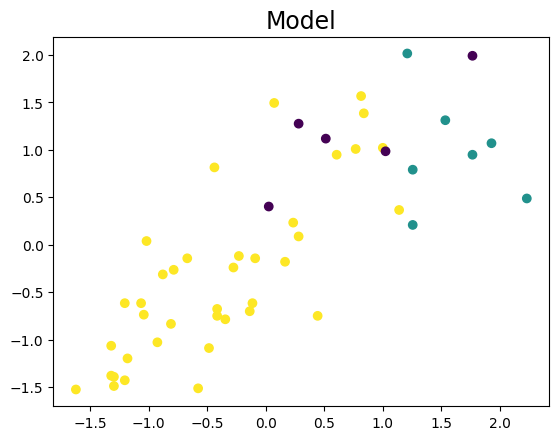

In [90]:
db = DBSCAN(min_samples =2, eps =1.2).fit(std_data)
db.labels_
plt.scatter(data=scaled_df,x='Murder',y='Assault',c=db.labels_)
plt.title('Model',size=17)

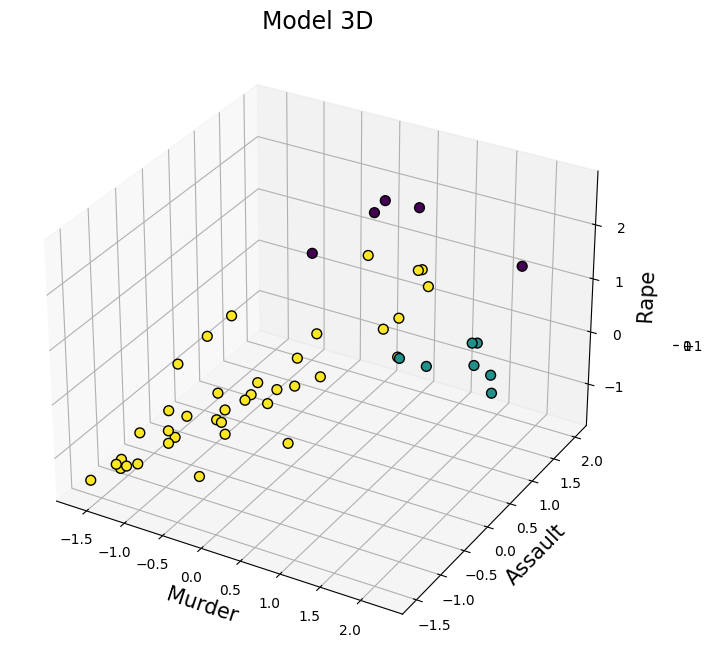

In [92]:
from mpl_toolkits import mplot3d
fig=plt.figure(figsize=(12,8))
ax=plt.axes(projection='3d')
f=ax.scatter3D(xs=scaled_df.Murder,ys=scaled_df.Assault,depthshade=False,ec='black',zs=scaled_df.Rape,c=db.labels_,s=50)
#c=model.cluster_centers_
#ax.scatter3D(xs=c[:,0],ys=c[:,1],zs=c[:,3],c='black',s=110,alpha=.9)
#for j,i in enumerate(c):
#    ax.text(x=i[0]+0.01,y=i[1],z=i[3],s='C'+str(j),fontweight='bold',size=15)
ax.set_xlabel('Murder',size=15)
ax.set_ylabel('Assault',size=15)
ax.set_zlabel('Rape ',size=15)
fig.colorbar(f, ax = ax, shrink = 0, aspect = 5)
plt.title('Model 3D',size=17);

# **Insights**
## **The DBSCAN model with epsilon=1.2 and minimum sample of 2 have high silhouette score and the data is clustered properly.**


---



---

